# PA 1: Exploratory Analysis over Federal Emergencies and Disasters

## Dataset Details

In this assignment, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05-02-1953,GA,NaN,Tornado,Tornado,05-02-1953,05-02-1953,06-01-1954,Yes,No,Yes,Yes
1,DR-2,Disaster,5/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,5/15/1953,5/15/1953,01-01-1958,Yes,No,Yes,Yes
2,DR-3,Disaster,5/29/1953,LA,NaN,Flood,Flood,5/29/1953,5/29/1953,02-01-1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06-02-1953,MI,NaN,Tornado,Tornado,06-02-1953,06-02-1953,02-01-1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06-06-1953,MT,NaN,Flood,Floods,06-06-1953,06-06-1953,12-01-1955,Yes,No,Yes,Yes


# Task 1: Statistical Exploratory Data Analysis


In [4]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n")
print(df_data.info())

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Start Date' column of the df_data 

#######################print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are\n")
#######################print("The unique dates are:")
#######################print(df_data['Start Date'].unique())
#######################print("\nFrequency of each date is as follows:")
#######################print(df_data['Start Date'].value_counts())
print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are:\n",df_data['Start Date'].describe())

# 10 points
#Task 1-d: Print ALL the unique values of Disaster Title and Counties  .
disaster_title_list  = df_data['Disaster Title'].unique()
unique_county_list =  df_data['County'].unique()
####unique_county_list = unique_county_list1.delete(unique_county_list,1)
print ("\n\n >>Task 1-d:")
print("The unique Disaster Titles ar as follows: \n")
print(disaster_title_list)
print("#####################################################")
print("\nThe unique  county list is as follows: ")
print(list(unique_county_list[1:]))



>>Task 1-a: Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46185 entries, 0 to 46184
Data columns (total 14 columns):
Declaration Number                  46185 non-null object
Declaration Type                    46185 non-null object
Declaration Date                    46185 non-null object
State                               46185 non-null object
County                              45988 non-null object
Disaster Type                       46185 non-null object
Disaster Title                      46185 non-null object
Start Date                          46185 non-null object
End Date                            45843 non-null object
Close Date                          35210 non-null object
Individual Assistance Program       46185 non-null object
Individuals & Households Program    46185 non-null object
Public Assistance Program           46185 non-null object
Hazard Mitigation Program           46185 non-null object
dtypes: object(14)
memory usag

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [26]:
# 8 points
#Task 2-a: Find out the declaration titles of type 'Emergency' which lasted more than 120 days
from datetime import date 
df_data['numberofdays']= (pd.to_datetime(df_data['End Date'])- pd.to_datetime(df_data['Start Date'])).dt.days
data = df_data[(df_data['Declaration Type'] == 'Emergency') & (df_data.numberofdays > 120)]
Emergency_greater_120=data['Disaster Title'].unique()

print (">>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are %s" 
       % (Emergency_greater_120))


# 8 points
#Task 2-b: Find out the total number of declarations between 1998 and 1999 where Individual Assistance Program was provided for the state of Texas.
#

num_declarations_1998_1999 = len(df_data[(df_data['State']=='TX')&(df_data['Individual Assistance Program']=='Yes') & (((pd.to_datetime(df_data['Declaration Date'])).dt.year==1998 ) | ((pd.to_datetime(df_data['Declaration Date'])).dt.year==1999 ))])

print ("\n\n>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were %s" 
       % (num_declarations_1998_1999))

# 14 points
#Task 2-c: Find out the top 10 counties with the declaration type 'Disaster' and 'Emergency' for all years.
n = 10
disr=df_data[df_data['Declaration Type']=='Disaster']
disr.dropna()
disr=disr.groupby('County').count().sort_values(by='Declaration Number',ascending=False).iloc[0:10,:]
disr=disr.reset_index()
top10_disasters=disr["County"]
emy=df_data[df_data['Declaration Type']=='Emergency']
emy.dropna()
emy=emy.groupby('County').count().sort_values(by='Declaration Number',ascending=False).iloc[0:10,:]
emy=emy.reset_index()
top10_emergencies=emergency["County"]
print ("\n\n>>Task 2-c: top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>>Task 2-c: top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))




>>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are ['Extreme  Fire Hazard' 'Fire' 'Extreme Fire Hazards' 'West Nile Virus'
 'Drought' 'Wildfires']


>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were 322


>>Task 2-c: top 10 counties with the most disasters for all years are: 
0    Washington County
1     Jefferson County
2       Jackson County
3      Franklin County
4       Lincoln County
5          Clay County
6       Madison County
7    Montgomery County
8        Monroe County
9        Marion County
Name: County, dtype: object


>>Task 2-c: top 10 counties with the most emergencies for all years are: 
0    Washington County
1      Franklin County
2       Jackson County
3     Jefferson County
4    Montgomery County
5        Monroe County
6       Lincoln County
7       Madison County
8        Warren County
9        Marion County
Name: County, dtype: object


# Task 3: Visualization


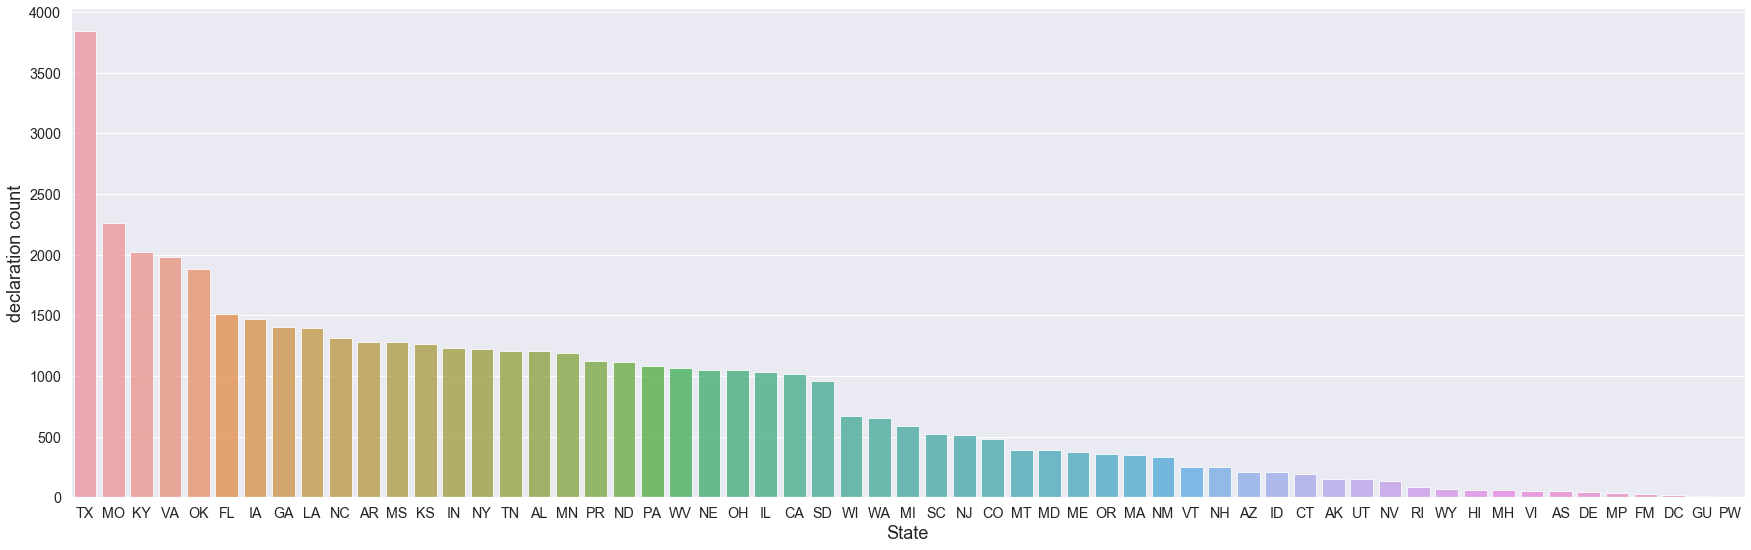

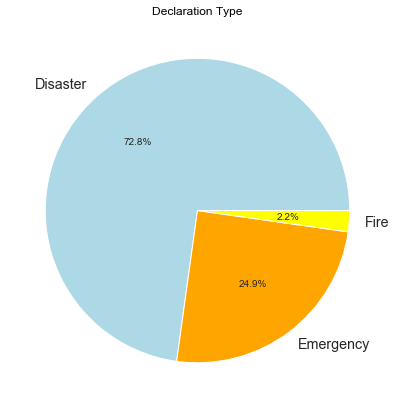

In [8]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the declaration count for each state . 
# Think of a way to nicely visualize all the states! 
#########################begin code for Task 3-a
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_data = pd.read_csv('database.csv')
state_count  = df_data['State'].value_counts()
state_count = state_count[:,]
plt.figure(figsize=(30,9))
sns.barplot(state_count.index, state_count.values, alpha=0.8)
plt.ylabel('declaration count', fontsize=18)
plt.xlabel('State', fontsize=18)
plt.show()

#########################end code for Task 3-a

# 20 points
# Task 3-b: Draw a pie chart that represents Declaration type.
#########################begin code for Task 3-b 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_data = pd.read_csv('database.csv')
labels=df_data['Declaration Type'].value_counts().index
colors=['lightblue','orange','yellow']
values=df_data['Declaration Type'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Declaration Type',color='black',fontsize=12)
plt.show()

#########################end code for Task 3-b

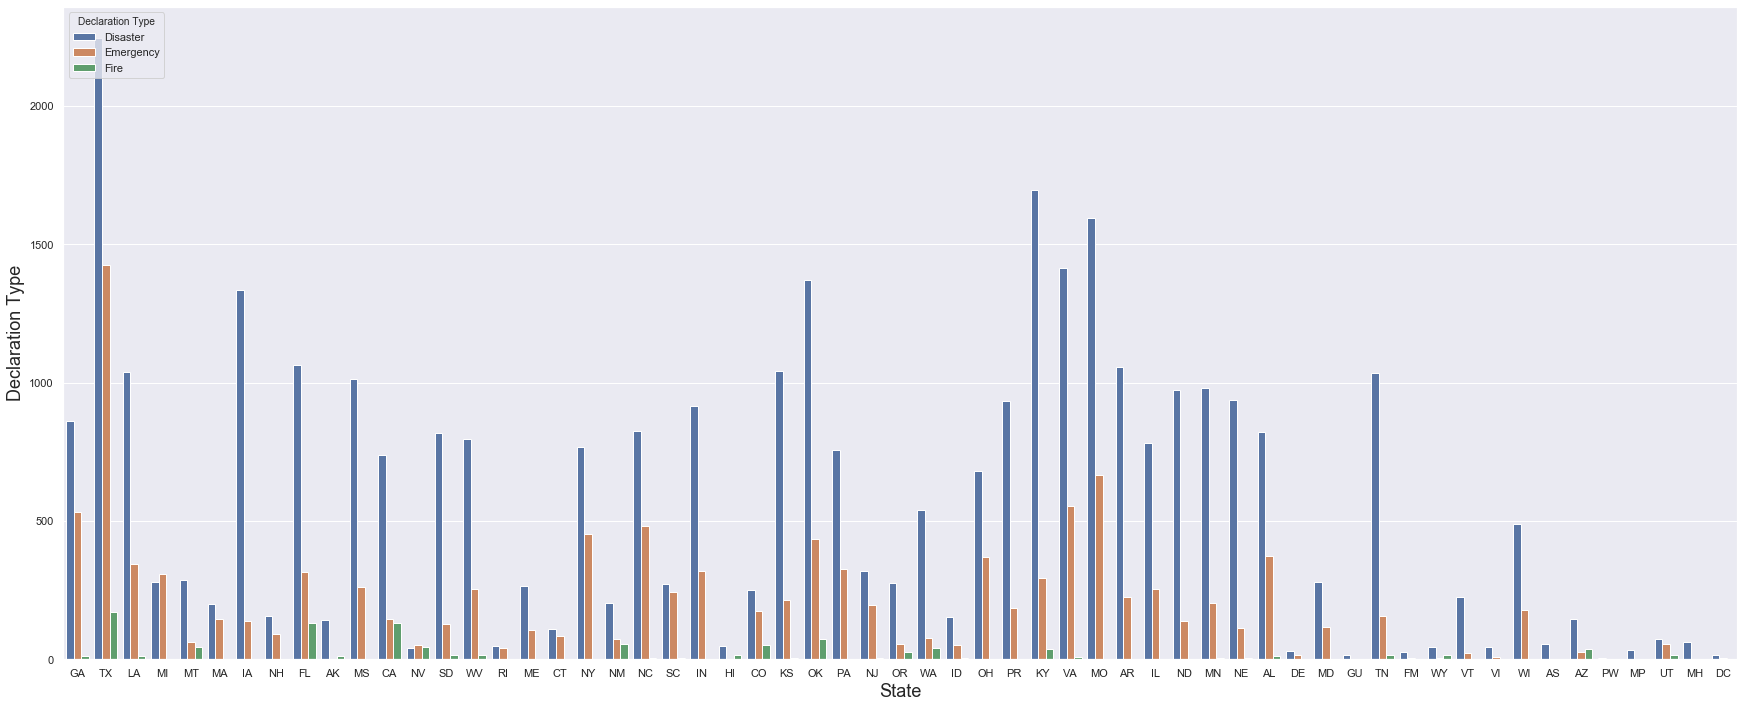

In th avove graph, we will get to know the declaration type count for each type i.e., for disaster, Emergency, Fire for each state. Here by plotting the graph we will get to know which declaration type is highest in which particular state
 


In [27]:
#########################begin code for Task 4
e
#########################end code for Task 4

print("In th avove graph, we will get to know the declaration type count for each type i.e., for disaster, Emergency, Fire for each state. Here by plotting the graph we will get to know which declaration type is highest in which particular state\n ")



Weka is used to visualize the data

In [5]:
# 20 point
#########################begin code for Task 5
print("Procedure\n By selecting tools option on weka then select the ARFFViewer and then upload the csv file to convert to arff file by modifying the csv file if required then save it as arff file. Graphs can be obtained by uploading the obtained arff file and then choosing the attributes for plotting the graph ")
#########################end code for Task 5


Procedure
 By selecting tools option on weka then select the ARFFViewer and then upload the csv file to convert to arff file by modifying the csv file if required then save it as arff file. Graphs can be obtained by uploading the obtained arff file and then choosing the attributes for plotting the graph 


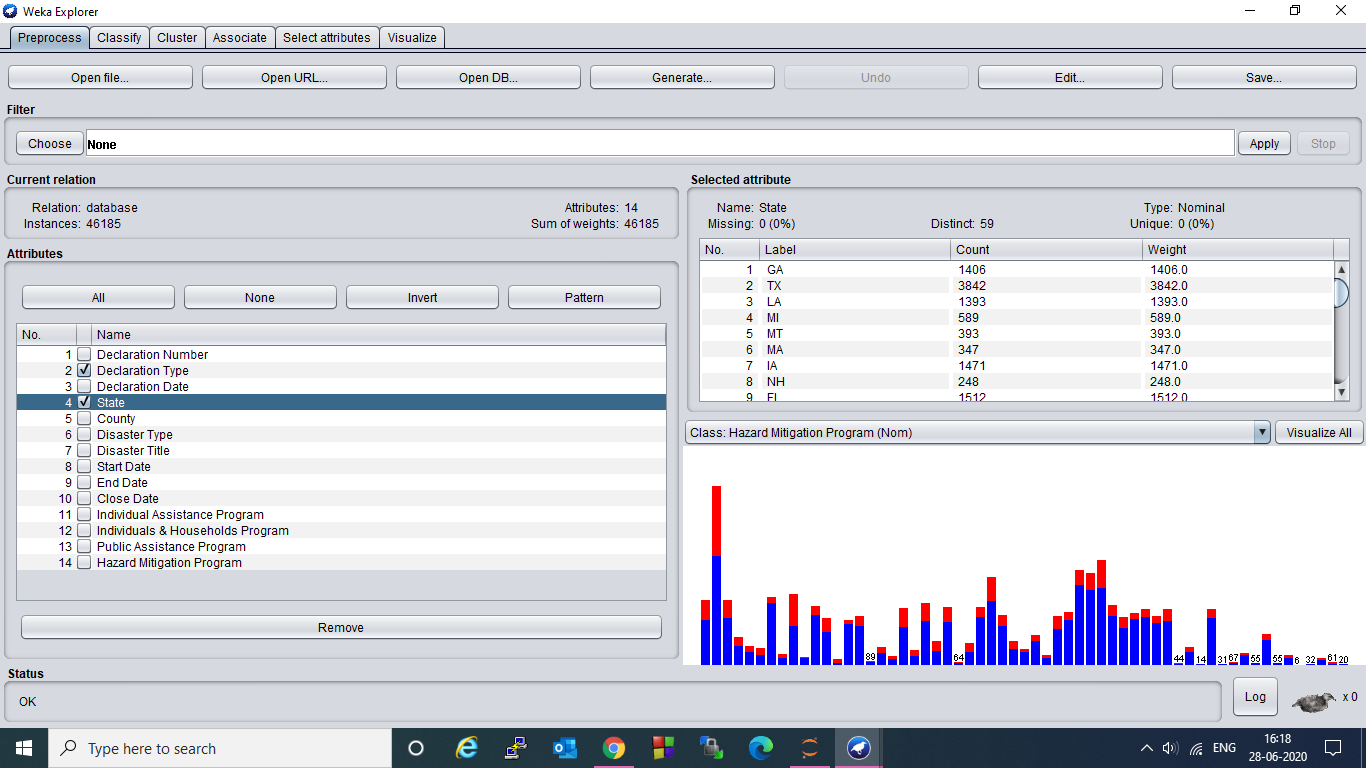

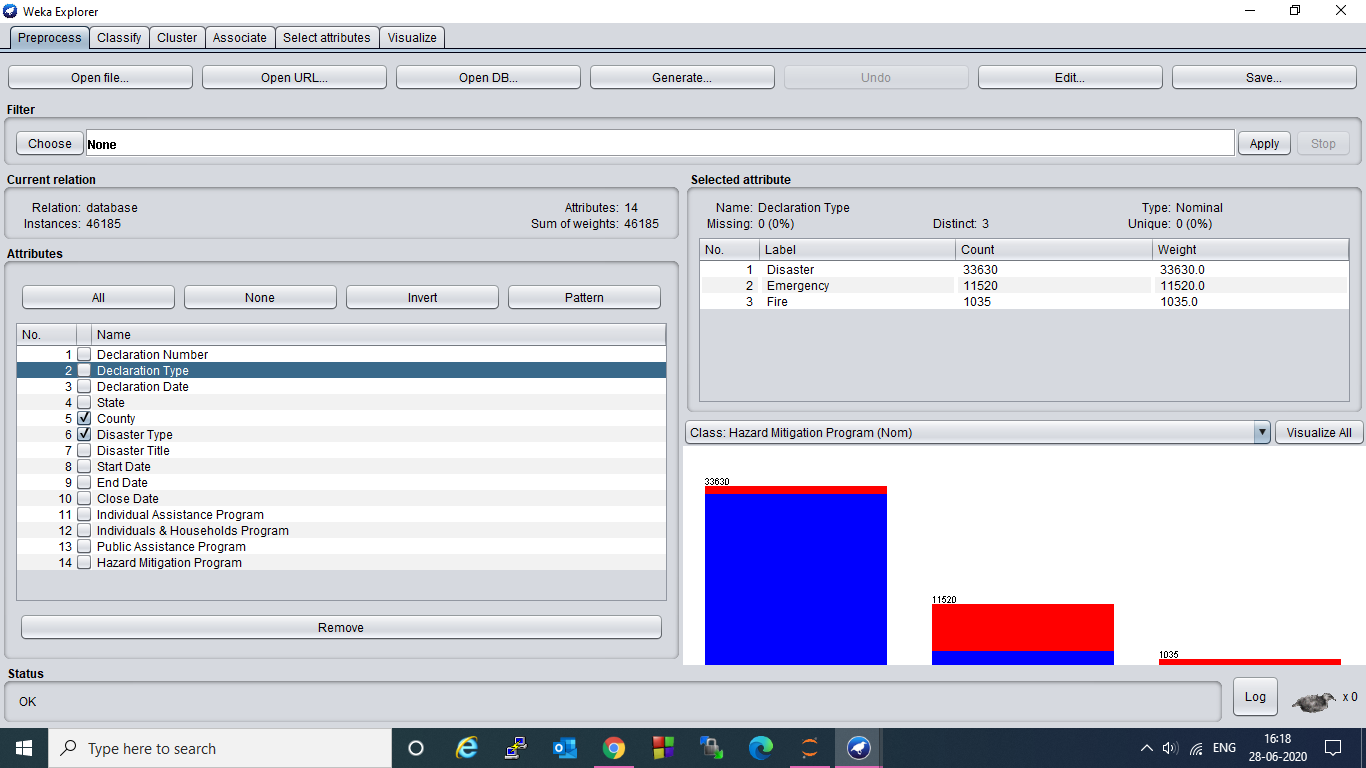

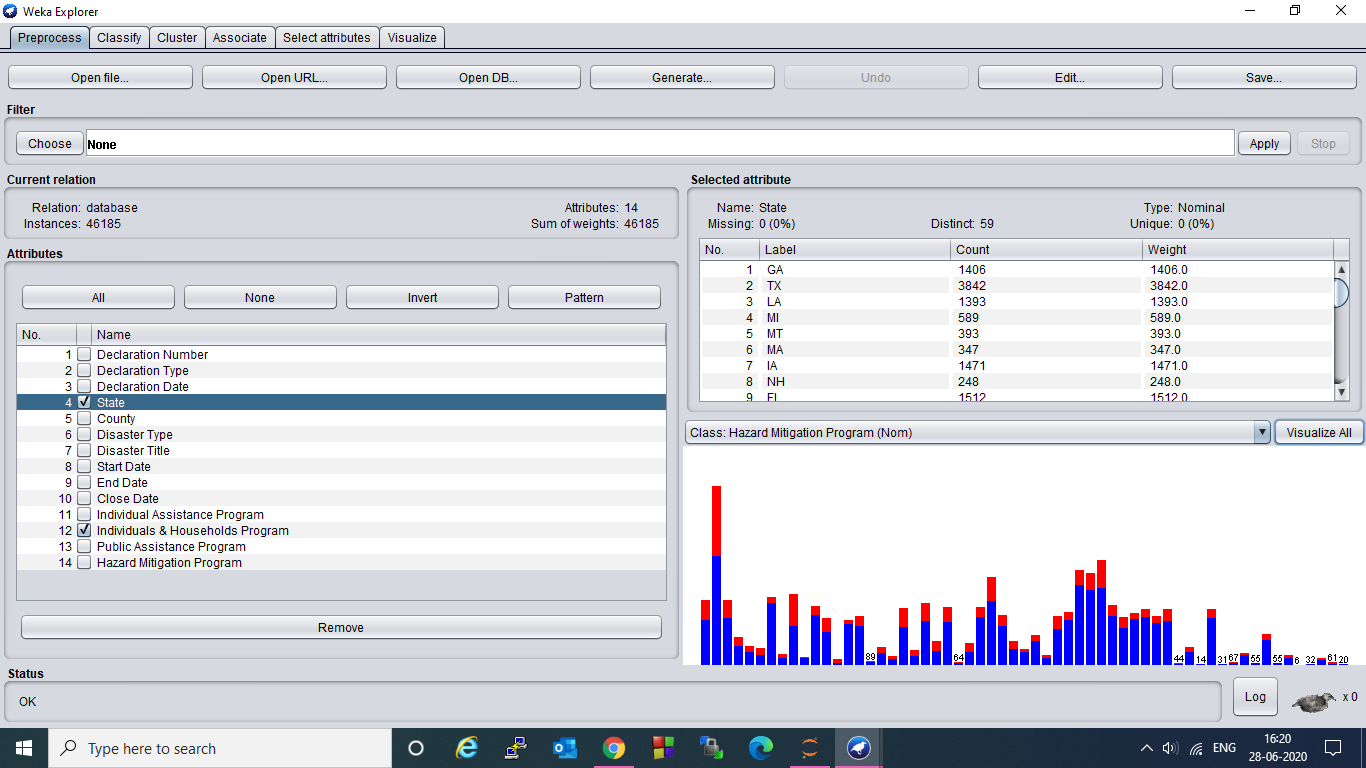

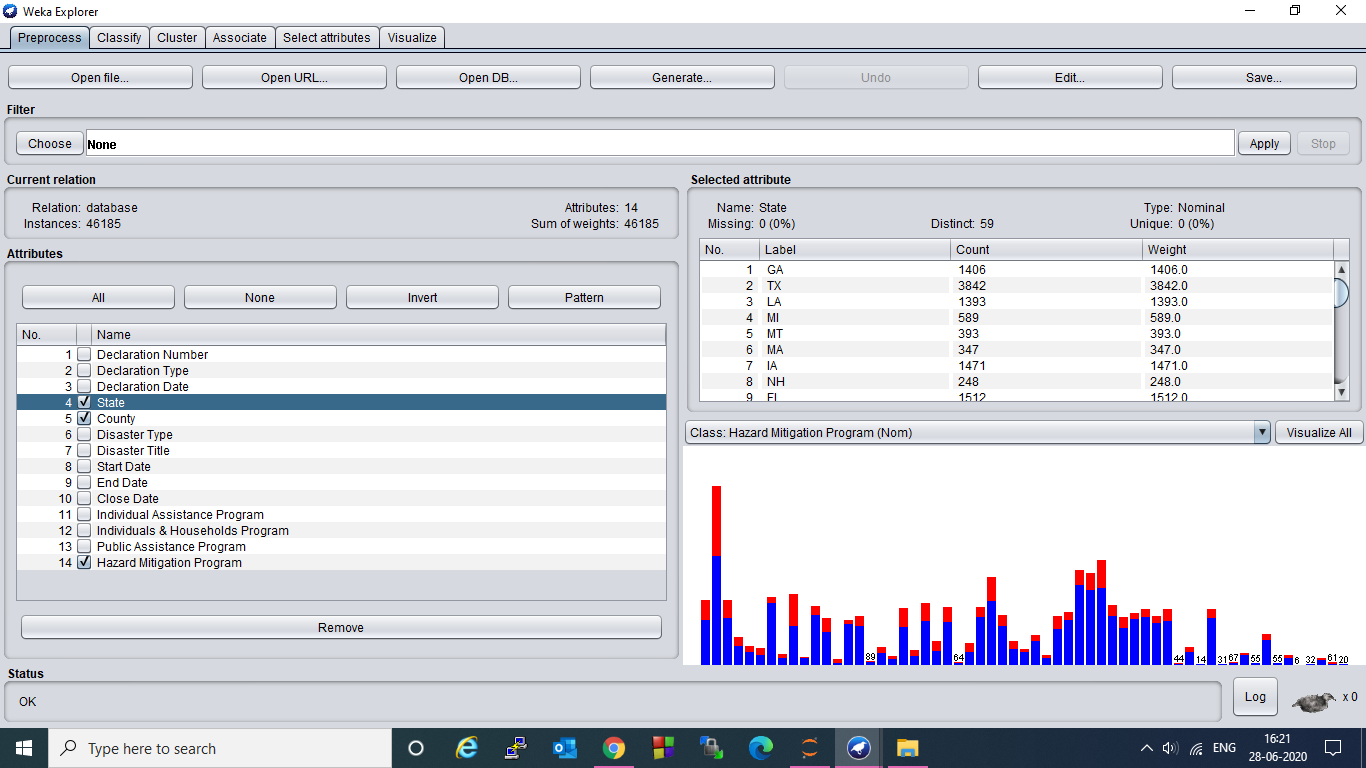